[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kjmobile/lb/blob/main/1_LM_Simple_Linear_to_Polynomial_Regression_df.ipynb)

# Simple Linear to Polynomial Regression (DataFrame Ver.)
This notebook implements linear and polynomial regression using pandas DataFrame directly.

## Data Prep

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [20]:
# Load data
fish_df = pd.read_csv('https://raw.githubusercontent.com/kjmobile/data/refs/heads/main/ml/fish_l.csv')
fish_df.head()

,Species,Weight,Length,Height,Width
0,Bream,242.0,25.4,11.5200,4.0200
1,Bream,290.0,26.3,12.4800,4.3056
2,Bream,340.0,26.5,12.3778,4.6961
3,Bream,363.0,29.0,12.7300,4.4555
4,Bream,430.0,29.0,12.4440,5.1340


In [25]:
# Check data info
fish_df.shape

(159, 5)

In [24]:
fish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
 3   Height   159 non-null    float64
 4   Width    159 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.3+ KB


In [26]:
# Train-test split (DataFrame version)
train_df, test_df = train_test_split(fish_df, test_size=0.25, random_state=0)

# Separate X and y (keep DataFrame format)
train_X = train_df[['Length']]  # Double brackets to keep DataFrame
train_y = train_df['Weight']
test_X = test_df[['Length']]
test_y = test_df['Weight']

print(f"Train X shape: {train_X.shape}")
print(f"Train y shape: {train_y.shape}")
print(f"Test X shape: {test_X.shape}")
print(f"Test y shape: {test_y.shape}")

Train X shape: (119, 1)
Train y shape: (119,)
Test X shape: (40, 1)
Test y shape: (40,)


## Simple Linear Regression

Model equation: $Weight = \beta_1 \times Length + \beta_0$

In [27]:
# Train model
m1 = linear_model.LinearRegression()
m1.fit(train_X, train_y)

LinearRegression()

In [28]:
# Check coefficients
print(f"Coefficient (β1): {m1.coef_[0]:.2f}")
print(f"Intercept (β0): {m1.intercept_:.2f}")
print(f"\nModel Equation: Weight = {m1.coef_[0]:.2f} × Length + {m1.intercept_:.2f}")

Coefficient (β1): 28.84
Intercept (β0): -422.75

Model Equation: Weight = 28.84 × Length + -422.75


### Evaluate Model Performance: m1

In [29]:
# Evaluate model with R² score
train_r2 = m1.score(train_X, train_y)
test_r2 = m1.score(test_X, test_y)

print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

Train R²: 0.8221
Test R²: 0.8612


In [30]:
# Prediction using DataFrame (no warning)
length_60_pred = m1.predict(pd.DataFrame({'Length': [60]}))[0]
print(f"Predicted weight for 60 inch fish: {length_60_pred:.2f} lbs")

Predicted weight for 60 inch fish: 1307.62 lbs


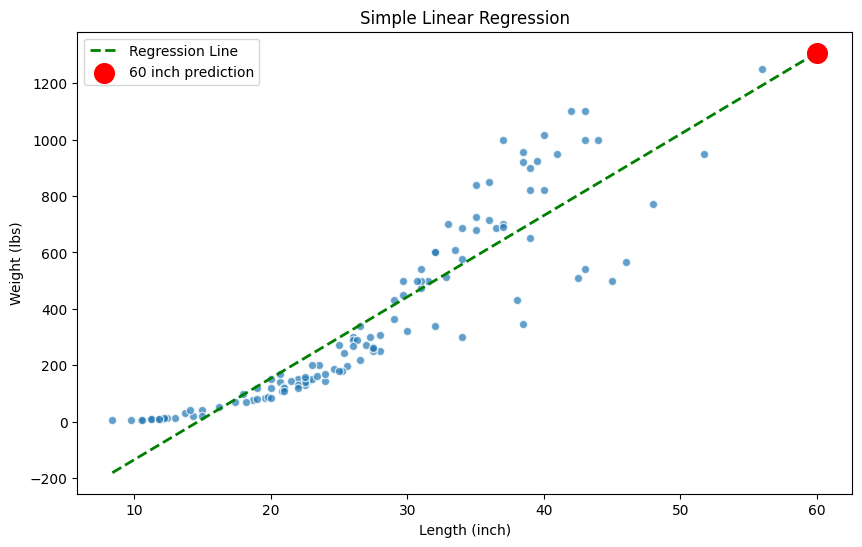

In [34]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(train_X['Length'], train_y, edgecolor='w', alpha=0.7)

# Predictions using DataFrame format
line_x = pd.DataFrame({'Length': [8.4, 60]})
plt.plot([8.4, 60], m1.predict(line_x), ls='--', color='green', linewidth=2, label='Regression Line')

pred_60 = pd.DataFrame({'Length': [60]})
plt.scatter(60, m1.predict(pred_60), color='r', marker="o", s=200, label='60 inch prediction', zorder=5)

plt.xlabel('Length (inch)')
plt.ylabel('Weight (lbs)')
plt.title('Simple Linear Regression')
plt.legend()


## Polynomial Regression

Model equation: $Weight = \beta_2 \times Length^2 + \beta_1 \times Length + \beta_0$

In [35]:
# Add polynomial features (DataFrame version)
train_X_poly = train_X.copy()
train_X_poly['Length_squared'] = train_X['Length'] ** 2

test_X_poly = test_X.copy()
test_X_poly['Length_squared'] = test_X['Length'] ** 2

# Reorder columns (Length², Length order)
train_X_poly = train_X_poly[['Length_squared', 'Length']]
test_X_poly = test_X_poly[['Length_squared', 'Length']]

print("Train X poly shape:", train_X_poly.shape)
print("\nFirst 5 rows:")
train_X_poly.head()

Train X poly shape: (119, 2)

First 5 rows:


,Length_squared,Length
109,1075.84,32.8
74,225.00,15.0
97,576.00,24.0
27,1296.00,36.0
157,204.49,14.3


In [36]:
# Train model
m2 = linear_model.LinearRegression()
m2.fit(train_X_poly, train_y)

LinearRegression()

In [37]:
# Check coefficients
print(f"Coefficient for Length² (β2): {m2.coef_[0]:.2f}")
print(f"Coefficient for Length (β1): {m2.coef_[1]:.2f}")
print(f"Intercept (β0): {m2.intercept_:.2f}")
print(f"\nModel Equation: Weight = {m2.coef_[0]:.2f} × Length² + {m2.coef_[1]:.2f} × Length + {m2.intercept_:.2f}")

Coefficient for Length² (β2): 0.18
Coefficient for Length (β1): 18.31
Intercept (β0): -290.02

Model Equation: Weight = 0.18 × Length² + 18.31 × Length + -290.02


### Evaluate Model Performance: m2

In [38]:
# Evaluate model with R² score
train_r2_poly = m2.score(train_X_poly, train_y)
test_r2_poly = m2.score(test_X_poly, test_y)

print(f"Train R²: {train_r2_poly:.4f}")
print(f"Test R²: {test_r2_poly:.4f}")

print("\n=== Model Comparison ===")
print(f"Linear Regression Test R²: {test_r2:.4f}")
print(f"Polynomial Regression Test R²: {test_r2_poly:.4f}")
print(f"Improvement: {(test_r2_poly - test_r2):.4f}")

Train R²: 0.8271
Test R²: 0.8896

=== Model Comparison ===
Linear Regression Test R²: 0.8612
Polynomial Regression Test R²: 0.8896
Improvement: 0.0284


In [39]:
# Prediction using DataFrame (no warning)
pred_60_poly = pd.DataFrame({'Length_squared': [60**2], 'Length': [60]})
length_60_pred_poly = m2.predict(pred_60_poly)[0]

print(f"Predicted weight for 60 inch fish (polynomial): {length_60_pred_poly:.2f} lbs")
print(f"Predicted weight for 60 inch fish (linear): {length_60_pred:.2f} lbs")
print(f"Difference: {abs(length_60_pred_poly - length_60_pred):.2f} lbs")

Predicted weight for 60 inch fish (polynomial): 1466.95 lbs
Predicted weight for 60 inch fish (linear): 1307.62 lbs
Difference: 159.33 lbs


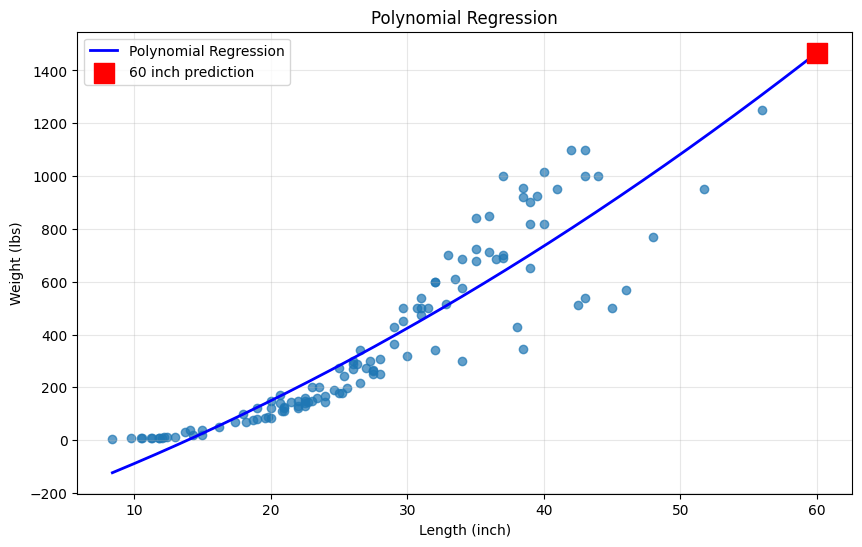

In [40]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(train_X['Length'], train_y, alpha=0.7)

# Draw polynomial regression line
point = np.arange(8.4, 60, 0.1)
predictions = m2.coef_[0] * point**2 + m2.coef_[1] * point + m2.intercept_
plt.plot(point, predictions, color='blue', linewidth=2, label='Polynomial Regression')

# Prediction for 60 inch using DataFrame
pred_60_poly = pd.DataFrame({'Length_squared': [60**2], 'Length': [60]})
plt.scatter(60, m2.predict(pred_60_poly), color='r', marker="s", s=200, label='60 inch prediction', zorder=5)

plt.xlabel('Length (inch)')
plt.ylabel('Weight (lbs)')
plt.title('Polynomial Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Compare Both Models

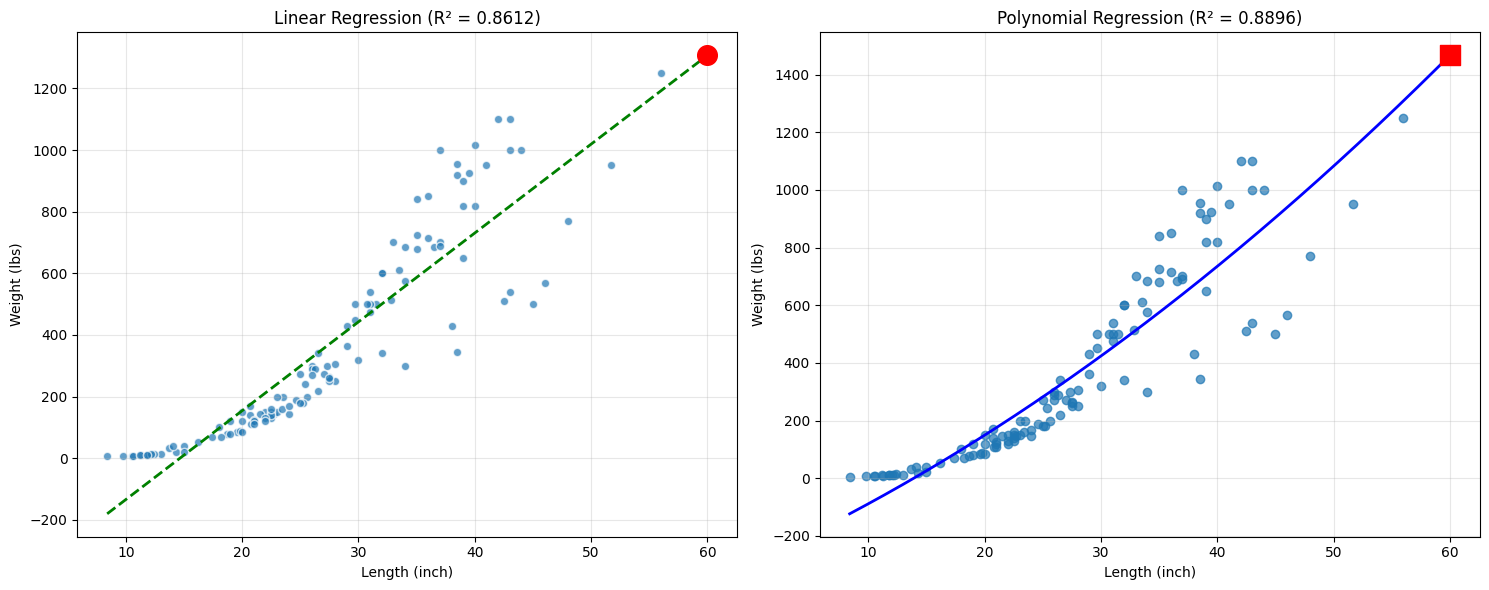

In [42]:
# Side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Linear Regression
axes[0].scatter(train_X['Length'], train_y, edgecolor='w', alpha=0.7)
line_x = pd.DataFrame({'Length': [8.4, 60]})
axes[0].plot([8.4, 60], m1.predict(line_x), ls='--', color='green', linewidth=2)
pred_60_linear = pd.DataFrame({'Length': [60]})
axes[0].scatter(60, m1.predict(pred_60_linear), color='r', marker="o", s=200, zorder=5)
axes[0].set_xlabel('Length (inch)')
axes[0].set_ylabel('Weight (lbs)')
axes[0].set_title(f'Linear Regression (R² = {test_r2:.4f})')
axes[0].grid(True, alpha=0.3)

# Polynomial Regression
axes[1].scatter(train_X['Length'], train_y, alpha=0.7)
point = np.arange(8.4, 60, 0.1)
predictions = m2.coef_[0] * point**2 + m2.coef_[1] * point + m2.intercept_
axes[1].plot(point, predictions, color='blue', linewidth=2)
pred_60_poly = pd.DataFrame({'Length_squared': [60**2], 'Length': [60]})
axes[1].scatter(60, m2.predict(pred_60_poly), color='r', marker="s", s=200, zorder=5)
axes[1].set_xlabel('Length (inch)')
axes[1].set_ylabel('Weight (lbs)')
axes[1].set_title(f'Polynomial Regression (R² = {test_r2_poly:.4f})')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()